# Introduction to CNN and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car is front. 

Get the data from food101 dataset

However we have modified it to only use two classes(pizza and steak)

In [1]:
import tensorflow as tf

In [2]:
import zipfile
from urllib.request import urlretrieve

url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
filename = "pizza_steak.zip"

# Download the file
urlretrieve(url, filename)

# Unzip the downloaded file
zip_ref = zipfile.ZipFile(filename)
zip_ref.extractall()
zip_ref.close()


## Inspect the data

A vary crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of our data


In [3]:
import os

# Get the current directory
current_dir = os.getcwd()

# Construct the path to the pizza_steak directory
pizza_steak_path = os.path.join(current_dir, "pizza_steak")

# List files and directories in pizza_steak
for filename in os.listdir(pizza_steak_path):
  print(filename)


test
train


In [4]:
import os

# Get the current directory
current_dir = os.getcwd()

# Construct the path to the pizza_steak directory
pizza_steak_path = os.path.join(current_dir, "pizza_steak/train/steak")

# List files and directories in pizza_steak
for filename in os.listdir(pizza_steak_path):
  print(filename)


1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

In [5]:
# Walk through pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak\test
There are 0 directories and 250 images in pizza_steak\test\pizza
There are 0 directories and 250 images in pizza_steak\test\steak
There are 2 directories and 0 images in pizza_steak\train
There are 0 directories and 750 images in pizza_steak\train\pizza
There are 0 directories and 750 images in pizza_steak\train\steak


In [6]:
# Another way to find how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
num_steak_images_train

750

To Visualize our images lets get the class names programmatically

In [7]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names for the subdirectory
print(class_names)

['pizza' 'steak']


In [8]:
# Lets visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # Show the shape of the image

    return img



['2821048.jpg']
Image shape: (512, 512, 3)


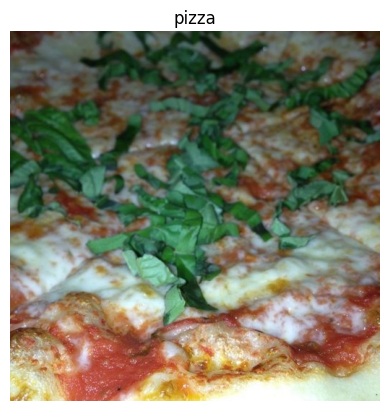

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 67,  51,  38],
        [ 67,  51,  38],
        [ 65,  47,  33],
        ...,
        [ 49,  33,   8],
        [ 47,  29,   7],
        [ 45,  27,   5]],

       [[ 65,  49,  36],
        [ 66,  50,  37],
        [ 65,  47,  33],
        ...,
        [ 51,  35,  10],
        [ 50,  32,  10],
        [ 48,  30,   8]],

       [[ 60,  44,  31],
        [ 62,  46,  33],
        [ 63,  45,  31],
        ...,
        [ 53,  37,  12],
        [ 53,  35,  13],
        [ 52,  34,  12]],

       ...,

       [[191, 147,  38],
        [183, 141,  33],
        [185, 141,  42],
        ...,
        [208, 231, 202],
        [210, 234, 202],
        [211, 235, 203]],

       [[207, 161,  50],
        [182, 138,  31],
        [176, 130,  32],
        ...,
        [209, 232, 203],
        [207, 231, 199],
        [207, 231, 199]],

       [[210, 164,  52],
        [191, 144,  36],
        [181, 135,  37],
        ...,
        [210, 233, 20

In [11]:
# Get all the pixel values between 0 and 1
img / 255.

array([[[0.2627451 , 0.2       , 0.14901961],
        [0.2627451 , 0.2       , 0.14901961],
        [0.25490196, 0.18431373, 0.12941176],
        ...,
        [0.19215686, 0.12941176, 0.03137255],
        [0.18431373, 0.11372549, 0.02745098],
        [0.17647059, 0.10588235, 0.01960784]],

       [[0.25490196, 0.19215686, 0.14117647],
        [0.25882353, 0.19607843, 0.14509804],
        [0.25490196, 0.18431373, 0.12941176],
        ...,
        [0.2       , 0.1372549 , 0.03921569],
        [0.19607843, 0.1254902 , 0.03921569],
        [0.18823529, 0.11764706, 0.03137255]],

       [[0.23529412, 0.17254902, 0.12156863],
        [0.24313725, 0.18039216, 0.12941176],
        [0.24705882, 0.17647059, 0.12156863],
        ...,
        [0.20784314, 0.14509804, 0.04705882],
        [0.20784314, 0.1372549 , 0.05098039],
        [0.20392157, 0.13333333, 0.04705882]],

       ...,

       [[0.74901961, 0.57647059, 0.14901961],
        [0.71764706, 0.55294118, 0.12941176],
        [0.7254902 , 0

Building a Convolutional neural network to find patterns in our images,  we need to
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of pixel values between 0 and 1, also call scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our data directories
train_dir = "C:/Tensorflow/pizza_steak/train"
test_dir = "C:/Tensorflow/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 34s 505ms/step - loss: 0.5914 - accuracy: 0.7060 - val_loss: 0.3932 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 8s 164ms/step - loss: 0.4362 - accuracy: 0.8087 - val_loss: 0.3601 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 7s 152ms/step - loss: 0.3919 - accuracy: 0.8187 - val_loss: 0.3353 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 7s 154ms/step - loss: 0.3629 - accuracy: 0.8527 - val_loss: 0.3156 - val_accuracy: 0.8800
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3249 - accuracy: 0.8680 - val_loss: 0.2934 - val_accuracy: 0.8820


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

Using the same model as before and training in ANN
We are building the model from [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.45792&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [14]:
# Set random seed
tf.random.set_seed(42)

# Building the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.7071 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 155ms/step - loss: 0.6918 - accuracy: 0.5073 - val_loss: 0.6791 - val_accuracy: 0.5760
Epoch 3/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6875 - accuracy: 0.5473 - val_loss: 0.6336 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6118 - accuracy: 0.5740 - val_loss: 0.5695 - val_accuracy: 0.7560
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.5886 - accuracy: 0.7467 - val_loss: 0.6625 - val_accuracy: 0.5820


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 6)                 903174    
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 903,199
Trainable params: 903,199
Non-trainable params: 0
_________________________________________________________________


# Improving our non cnn model


In [16]:
# Set random seed
tf.random.set_seed(42)

# Building our model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(92, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile our model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting our model
model_3.fit(train_data,
            epochs=25,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 10s 174ms/step - loss: 0.8828 - accuracy: 0.5387 - val_loss: 0.6707 - val_accuracy: 0.5000
Epoch 2/25
47/47 [==============================] - 7s 158ms/step - loss: 0.6970 - accuracy: 0.5060 - val_loss: 0.6909 - val_accuracy: 0.5240
Epoch 3/25
47/47 [==============================] - 9s 199ms/step - loss: 0.6898 - accuracy: 0.5593 - val_loss: 0.6817 - val_accuracy: 0.5000
Epoch 4/25
47/47 [==============================] - 9s 201ms/step - loss: 0.6721 - accuracy: 0.6140 - val_loss: 0.6487 - val_accuracy: 0.7600
Epoch 5/25
47/47 [==============================] - 10s 203ms/step - loss: 0.6291 - accuracy: 0.6887 - val_loss: 0.6917 - val_accuracy: 0.5140
Epoch 6/25
47/47 [==============================] - 9s 202ms/step - loss: 0.6456 - accuracy: 0.6493 - val_loss: 0.5844 - val_accuracy: 0.7600
Epoch 7/25
47/47 [==============================] - 7s 151ms/step - loss: 0.6056 - accuracy: 0.7327 - val_loss: 0.6626 - val_accuracy: 0.6000
Epoc

In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               19267712  
                                                                 
 dense_5 (Dense)             (None, 92)                11868     
                                                                 
 dense_6 (Dense)             (None, 64)                5952      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 4)                

In [18]:
# Set random seed
tf.random.set_seed(42)

# Building the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 160ms/step - loss: 3.1685 - accuracy: 0.6280 - val_loss: 0.8425 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.9337 - accuracy: 0.7040 - val_loss: 0.4732 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 6s 137ms/step - loss: 0.5972 - accuracy: 0.7467 - val_loss: 0.5465 - val_accuracy: 0.7700
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.5012 - accuracy: 0.7820 - val_loss: 0.4917 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4578 - accuracy: 0.7953 - val_loss: 0.4268 - val_accuracy: 0.7960


In [19]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 100)               15052900  
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down
1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model 
5. Evaluate the model
6. Adjust differemt parameters and improve the model (try to bear our baseline)
7. Repeat untill satisfied (keep experimenting)

# Visualize the data

['2394465.jpg']
Image shape: (384, 512, 3)
['3063955.jpg']
Image shape: (512, 512, 3)


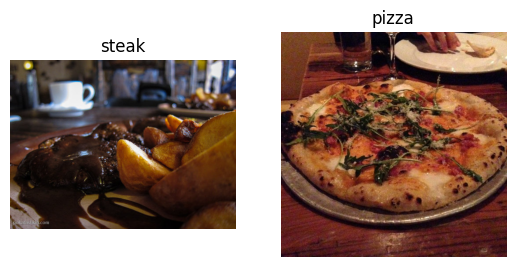

In [20]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Preprocessing


In [21]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**
A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.
It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor(GPU).

2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

In [22]:
!nvidia-smi

Thu Jul  4 13:14:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 556.12                 Driver Version: 556.12         CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   63C    P5              6W /   50W |    3154MiB /   4096MiB |     36%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [23]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directory of images
                                               target_size=(224, 224),  # target size of images (height, width)
                                               class_mode="binary", # Type of data we'r working with
                                               batch_size=32)   # Size of minibatches to lead data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
# Get a sample of train data batch
images, labels = train_data.next()  # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [26]:
# How many batches are there?
len(train_data)

47

In [27]:
1500/32

46.875

In [28]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.04313726, 0.04313726, 0.01176471],
          [0.03137255, 0.03529412, 0.00392157],
          [0.01960784, 0.02352941, 0.        ],
          ...,
          [0.07450981, 0.01568628, 0.00392157],
          [0.07450981, 0.01568628, 0.00392157],
          [0.06666667, 0.01176471, 0.        ]],
 
         [[0.01960784, 0.01568628, 0.        ],
          [0.0509804 , 0.04705883, 0.02745098],
          [0.03921569, 0.04313726, 0.01960784],
          ...,
          [0.07058824, 0.01176471, 0.        ],
          [0.07058824, 0.01176471, 0.        ],
          [0.0627451 , 0.00392157, 0.        ]],
 
         [[0.03137255, 0.02745098, 0.00784314],
          [0.02745098, 0.02352941, 0.00392157],
          [0.03529412, 0.03137255, 0.01176471],
          ...,
          [0.07450981, 0.01568628, 0.00392157],
          [0.07058824, 0.01176471, 0.        ],
          [0.07058824, 0.01176471, 0.        ]],
 
         ...,
 
         [[0.8745099 , 0.8588236 , 0.8235295 ],
          [0.88235

In [29]:
images[7].shape

(224, 224, 3)

In [30]:
# View the first batch of labels
labels

array([0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.],
      dtype=float32)

# Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that we setup whe beginning a machine learning experiment, we try to beat the baseline

> **Note:** In deep learning there is almost an infinite amount of architecture we could create. So one of the best ways to get started is to start with something simple and see if it works on our data and then introduce complecity as required

In [31]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [32]:
# Create the model
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
           activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # Output layer (working with binary classification so only 1 output neuron)
])

# filters is the number of sliding window going across an input (higher = more complex model)
# kernel_size is the size of the sliding window going across an input
# strides is the size of the step the sliding windows takes across an input
# padding - if "same", output shape is the same as inpuut shape, if "valid", output shape gets compressed


In [33]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [34]:
# Get the summary of our model
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_15 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Fit the model


In [35]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [36]:
# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 183ms/step - loss: 1.2404 - accuracy: 0.5787 - val_loss: 0.5281 - val_accuracy: 0.7420
Epoch 2/5
47/47 [==============================] - 7s 150ms/step - loss: 0.5287 - accuracy: 0.7473 - val_loss: 0.4330 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 7s 140ms/step - loss: 0.4416 - accuracy: 0.8033 - val_loss: 0.4922 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4520 - accuracy: 0.7993 - val_loss: 0.4109 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3783 - accuracy: 0.8393 - val_loss: 0.4405 - val_accuracy: 0.8140


# Evaluating our model

It looks like our model is learning something, let's evaluate it

<Axes: >

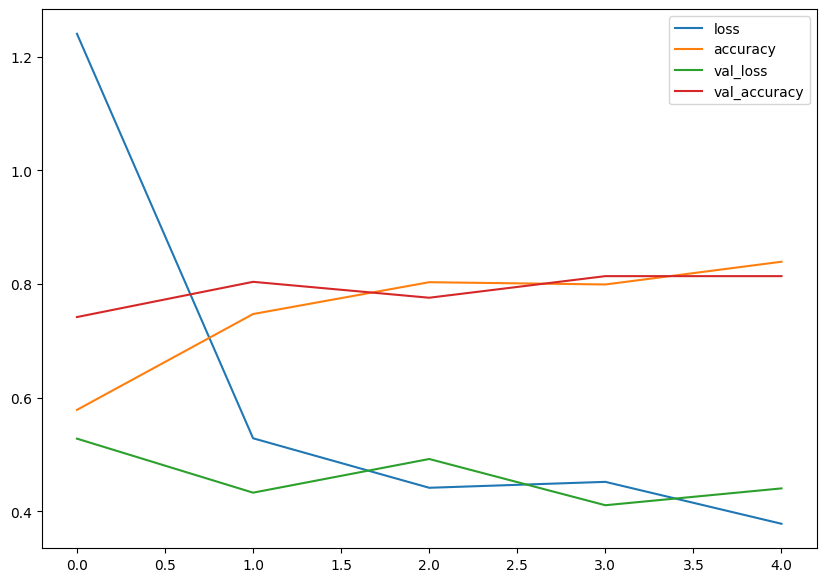

In [37]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [38]:
# Plot the validationn and training curves seperately
def plot_loss_curves(history):
    """
    returns seperate loss curves for training and validation metrics
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))    # How many epochs did we run for

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

**Note:** When in a model the validation loss starts to increase, its likely that the model is **overfitting** the training dataset. This means, its learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished

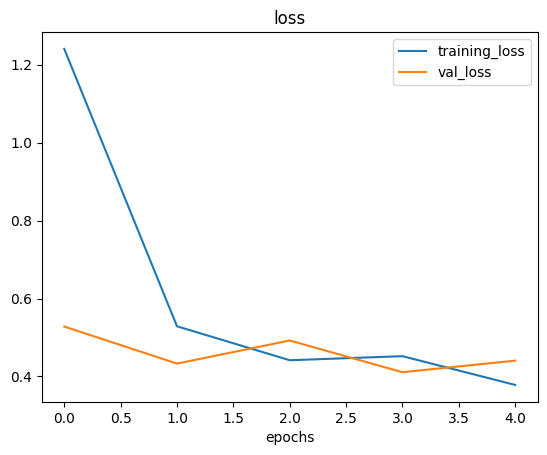

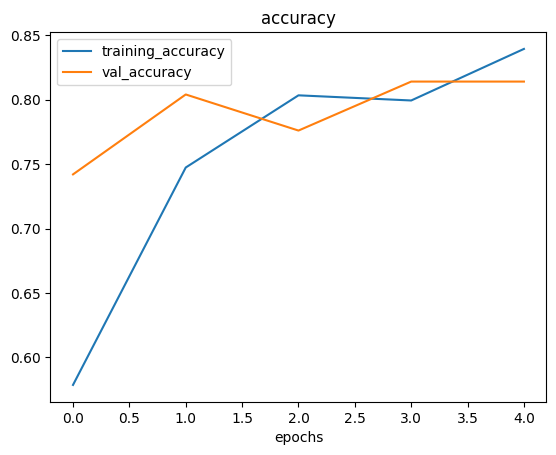

In [39]:
# Check out loss and accuracy of model_4
plot_loss_curves(history_4)

# Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data

**Note:** Reducing overfitting is also known as **regulatization**

In [40]:
# Create the model (this is going to be new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [41]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [42]:
# Fit the model
history_5 = model_5.fit(train_data, epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 162ms/step - loss: 0.6136 - accuracy: 0.6647 - val_loss: 0.4292 - val_accuracy: 0.8240
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4412 - accuracy: 0.8027 - val_loss: 0.3639 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 7s 147ms/step - loss: 0.4054 - accuracy: 0.8160 - val_loss: 0.3363 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.3790 - accuracy: 0.8320 - val_loss: 0.3318 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3681 - accuracy: 0.8353 - val_loss: 0.3232 - val_accuracy: 0.8680


In [43]:
model_5.evaluate(test_data)

16/16 [==============================] - 2s 120ms/step - loss: 0.3232 - accuracy: 0.8680


[0.3232157230377197, 0.8679999709129333]

In [44]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

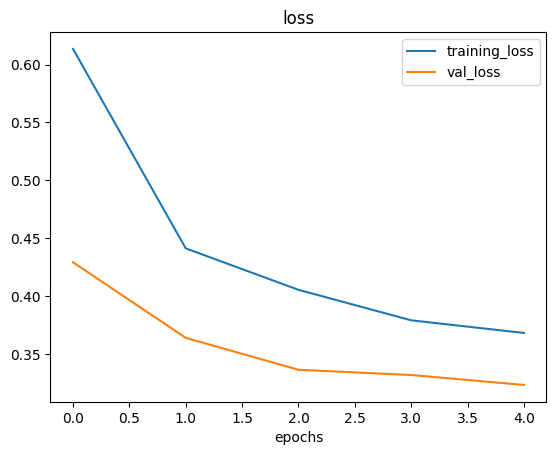

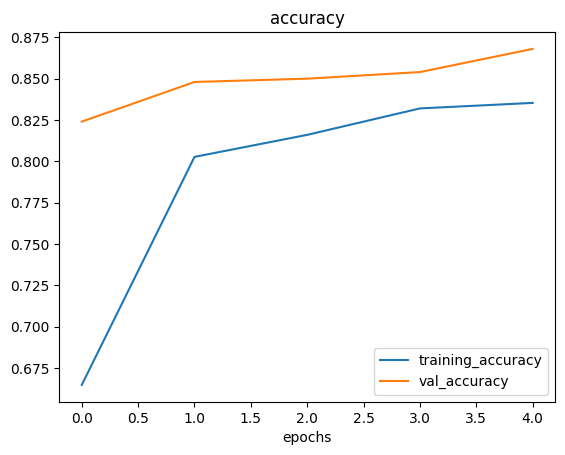

In [45]:
plot_loss_curves(history_5)

# Data Augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test data
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

In [47]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directories
train_dir = 'C:/Tensorflow/pizza_steak/train'
test_dir = 'C:/Tensorflow/pizza_steak/test'

# Create an ImageDataGenerator for data augmentation
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Create an ImageDataGenerator for non-augmented data
train_datagen = ImageDataGenerator(rescale=1./255)

# Create an ImageDataGenerator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Non Augmented test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')



Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Non Augmented test images:
Found 500 images belonging to 2 classes.


Data augmentation is usually performed on the training data. Using **ImageDataGenerator** build-in data augmentation parameters our images are left as they are in the directories but are more modified as they're loaded into the model.

In [48]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented...data data (images)


showing image number: 2


(-0.5, 223.5, 223.5, -0.5)

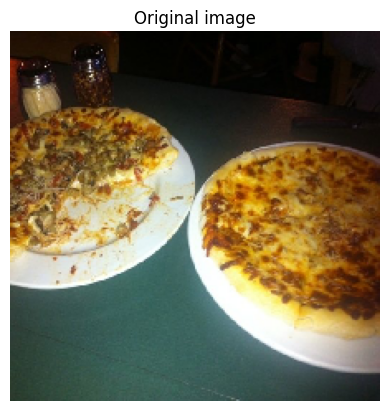

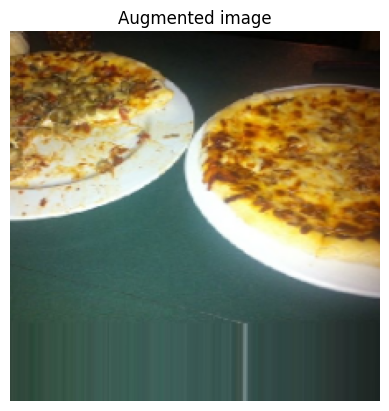

In [49]:
# Show the original image and augmented image
random_number = random.randint(0, 32) # Our batch sizes are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)


Build a model using augmented

In [50]:
# Create random seed
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")  
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model 
history_6 = model_6.fit(train_data_augmented, epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 23s 479ms/step - loss: 0.7117 - accuracy: 0.5373 - val_loss: 0.6826 - val_accuracy: 0.5120
Epoch 2/5
47/47 [==============================] - 21s 445ms/step - loss: 0.6900 - accuracy: 0.5133 - val_loss: 0.6687 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 29s 618ms/step - loss: 0.7320 - accuracy: 0.5787 - val_loss: 0.6451 - val_accuracy: 0.5940
Epoch 4/5
47/47 [==============================] - 20s 423ms/step - loss: 0.6851 - accuracy: 0.5507 - val_loss: 0.6331 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6629 - accuracy: 0.6100 - val_loss: 0.6313 - val_accuracy: 0.6040


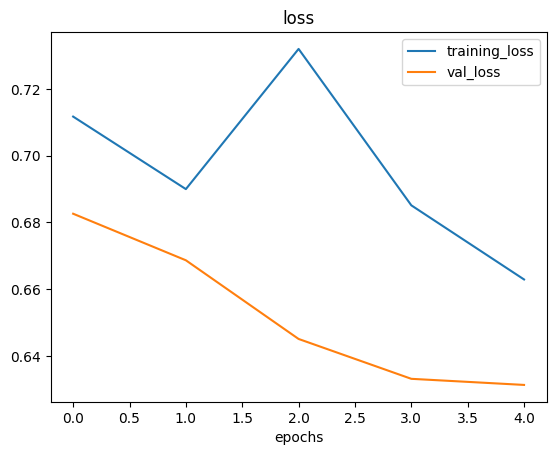

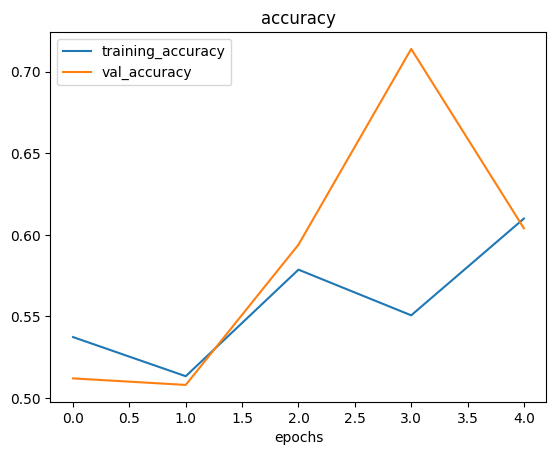

In [51]:
# Check our model training curve
plot_loss_curves(history_6)

In [52]:
# Lets shuffle our data 
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True)


Found 1500 images belonging to 2 classes.


In [53]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 21s 422ms/step - loss: 0.6673 - accuracy: 0.5873 - val_loss: 0.5415 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 19s 414ms/step - loss: 0.5435 - accuracy: 0.7313 - val_loss: 0.4336 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 21s 440ms/step - loss: 0.5310 - accuracy: 0.7447 - val_loss: 0.4481 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 27s 586ms/step - loss: 0.4903 - accuracy: 0.7733 - val_loss: 0.3837 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 21s 439ms/step - loss: 0.4657 - accuracy: 0.7853 - val_loss: 0.4127 - val_accuracy: 0.7980


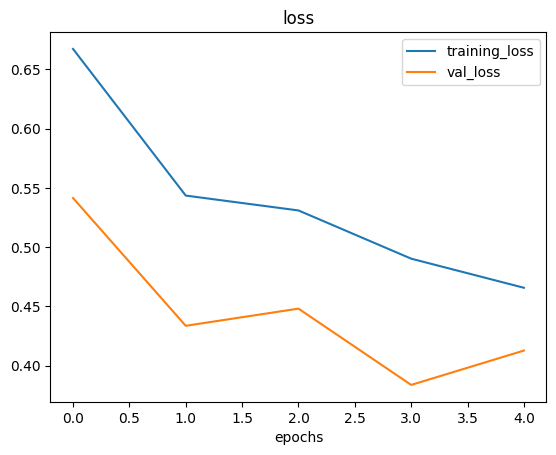

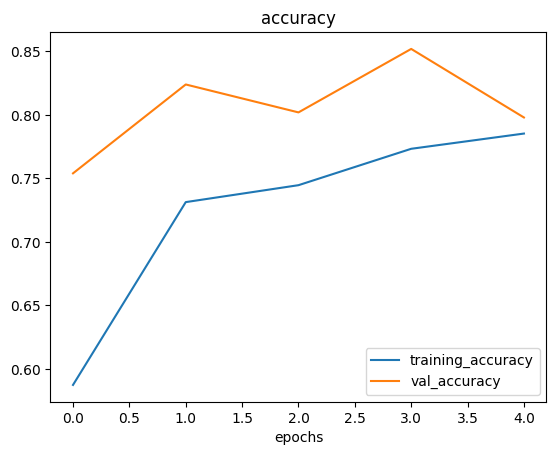

In [68]:
plot_loss_curves(history_7)

# Making a prediction with our trained model on our own custom data

In [69]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


In [70]:
# View our example image

import requests

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg"
response = requests.get(url)

# Save the image to a file (replace "steak.jpg" with your desired filename)
with open("steak.jpg", "wb") as f:
  f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


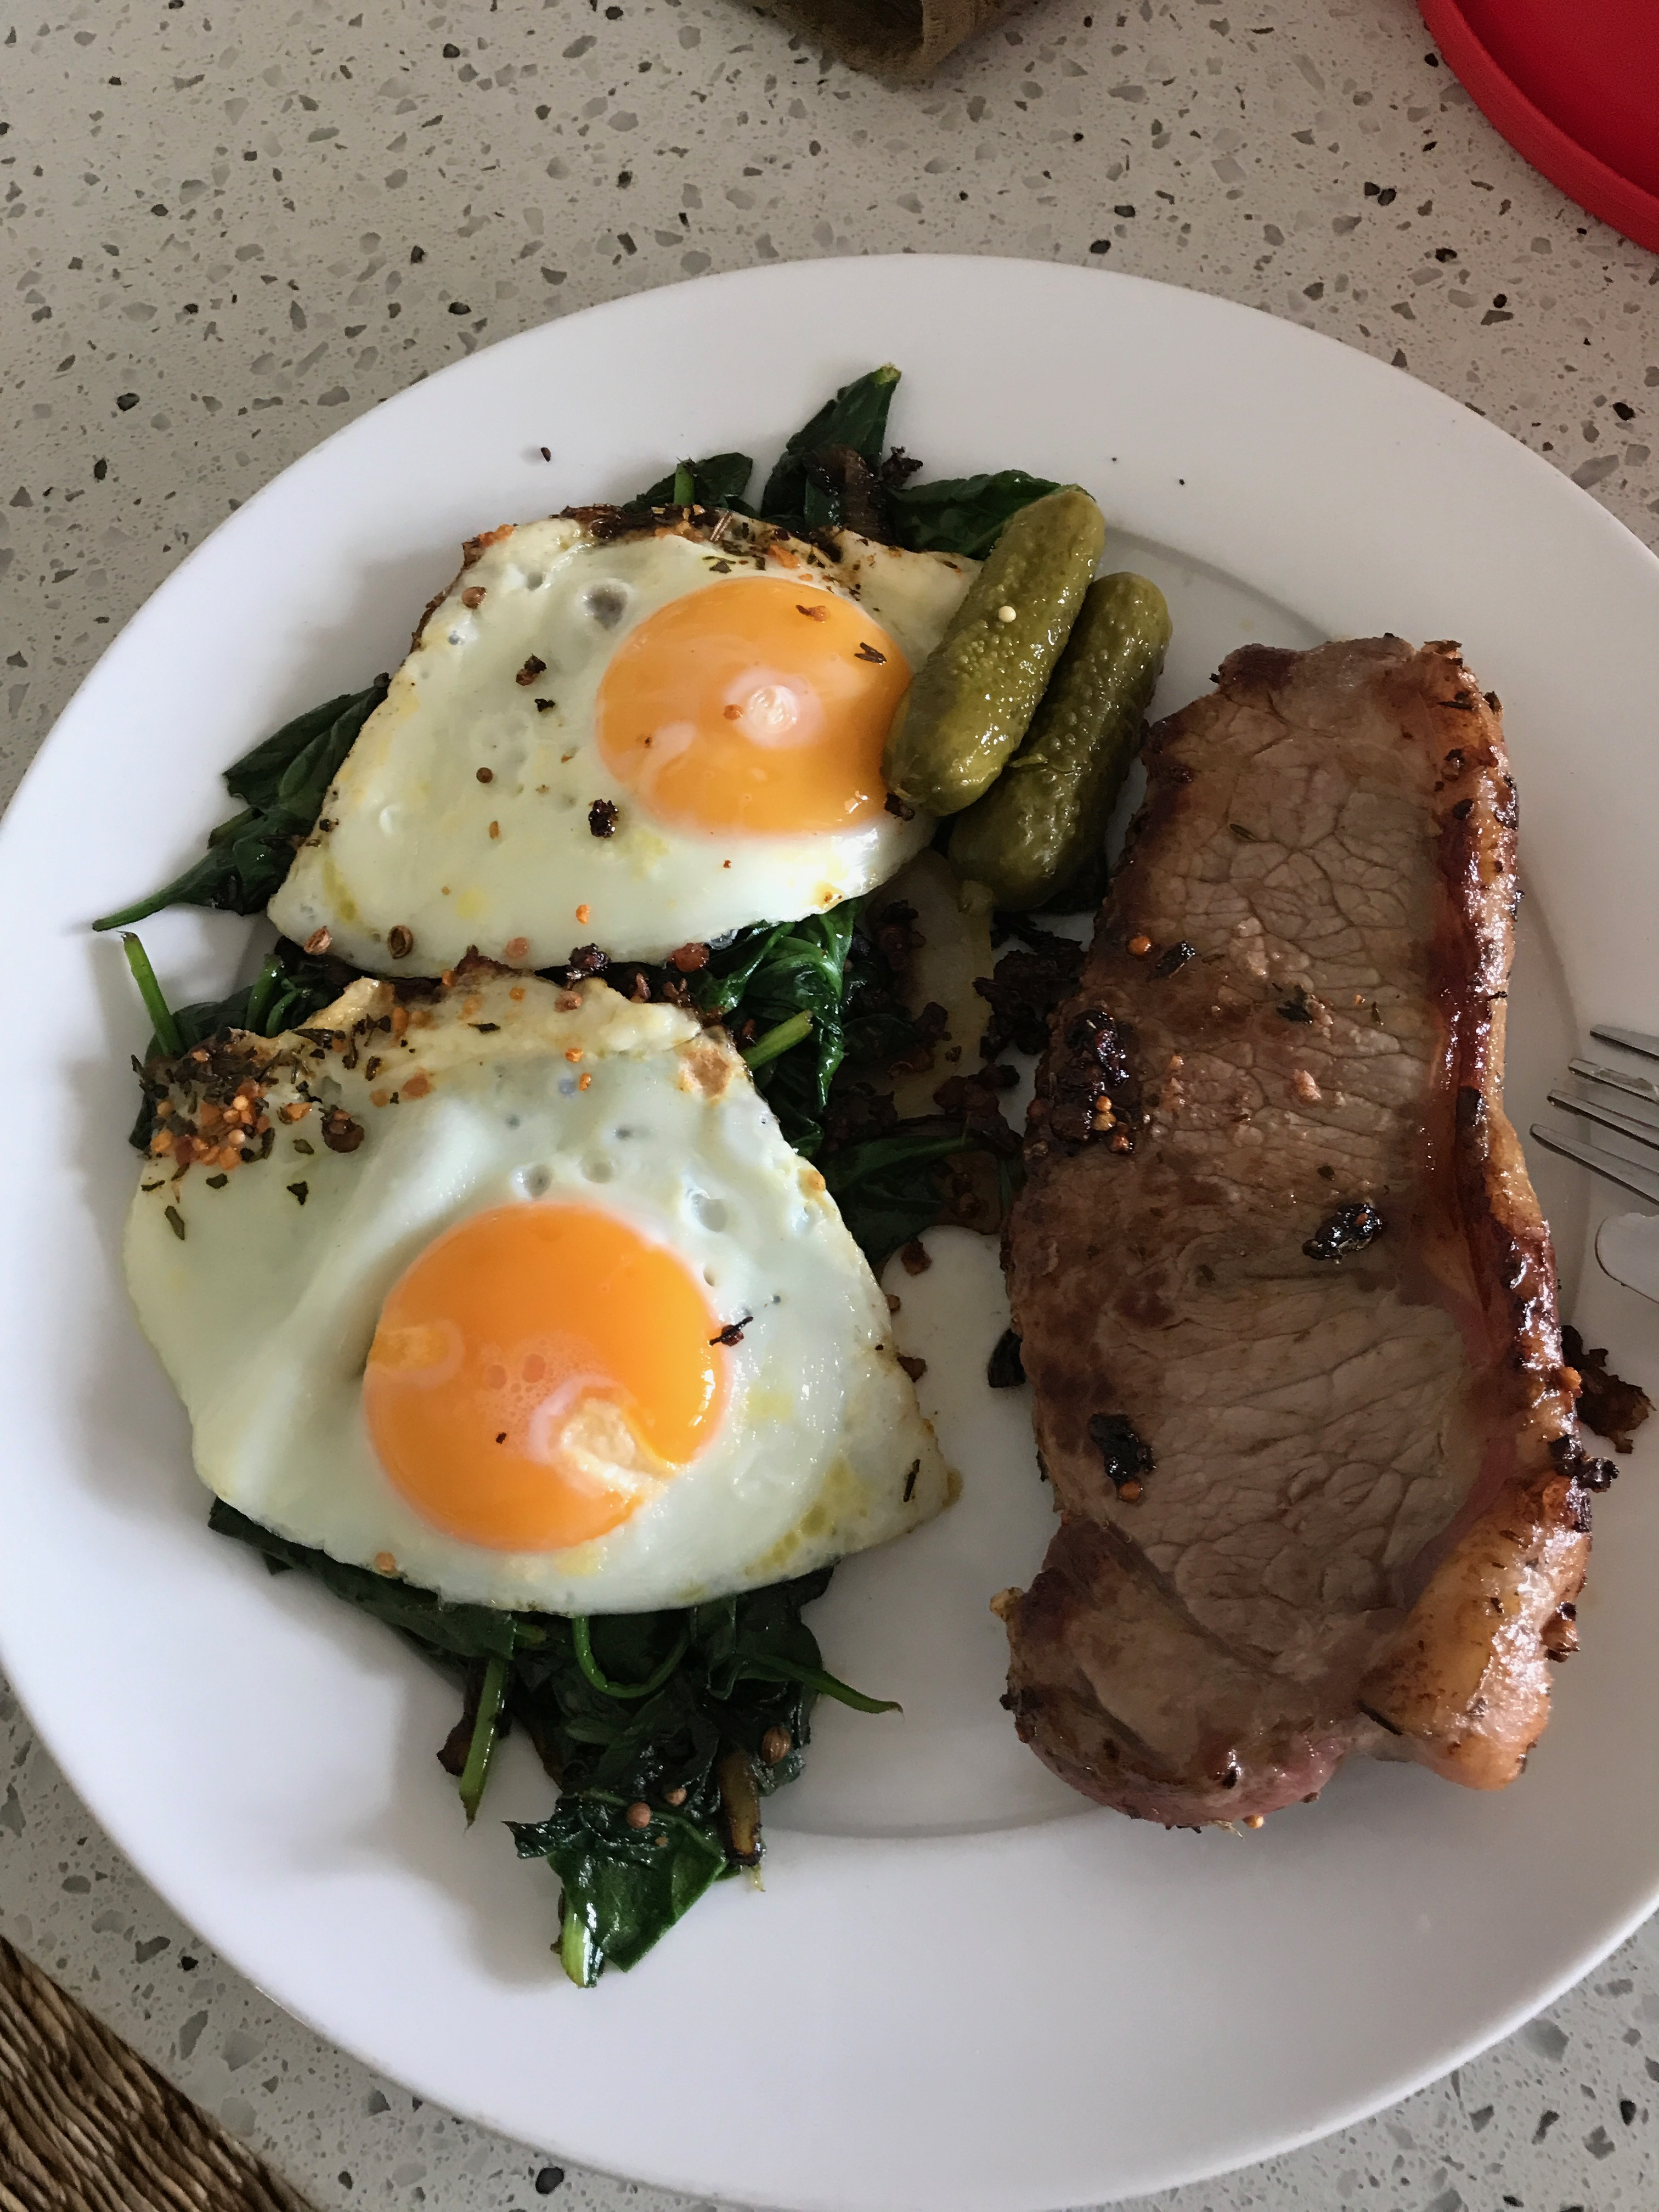

In [71]:
from IPython.display import Image
display(Image(filename="steak.jpg"))

In [72]:
# Check the shape of our image
steak_img.shape

(384, 512, 3)

In [73]:
# Create a function to import the image and resize it to be able to used with or model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it 
    to (img_shape, img_shape, color_channels) 
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decoce the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.

    return img

In [74]:
# Load in and preprocess our custom image
steak = load_and_prep_image("steak.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [75]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 33ms/step


array([[0.6423334]], dtype=float32)

Our custom image is put through model, however it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [76]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [77]:
# index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [78]:
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image and located at filename, makes a prediction with model
    and plots the image with the predicted class as the title
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 36ms/step


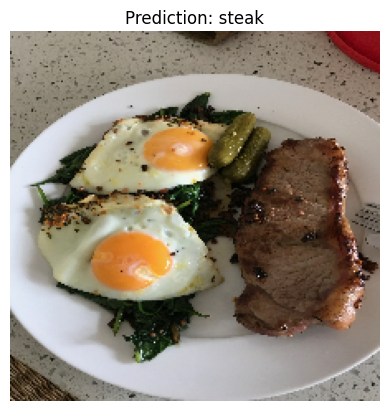

In [79]:
# Test our model on a custom image
pred_and_plot(model_7, 'steak.jpg')

1/1 [==============================] - 0s 29ms/step


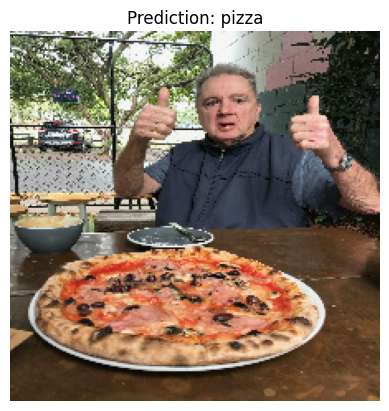

In [80]:

import requests

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg"
response = requests.get(url)

# Save the image to a file (replace "steak.jpg" with your desired filename)
with open("pizza_dad.jpg", "wb") as f:
  f.write(response.content)

pred_and_plot(model_7, "pizza_dad.jpg")
